In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 20,
    'n_epoch': 10,
    'lr': 0.005,
    'verbose': False,
    'eval_freq': 100,
    'batch_size': 16,
    'split': 0.8,
    'log': False,
    'action_dim': 2
}

policy_cfg = {
    'timesteps': 25000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 2
}

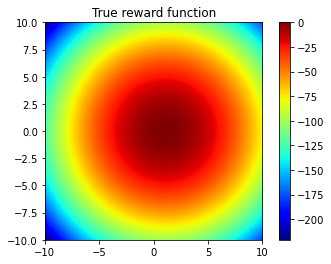

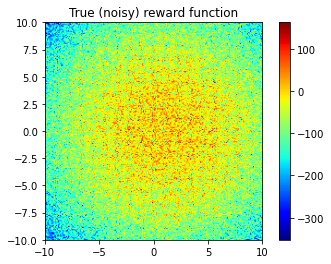

In [3]:
## Feedback loop

iterations = 10

# Create comparison function
f = lambda x: -(x[0]-1)**2
g = lambda x: -(x[1]-0)**2
sigma_f, sigma_g = 0.0, 50.0
reward_fn_true = lambda x : f(x) + g(x)
reward_fn_true_noisy = create_reward_fn(f, g, sigma_f, sigma_g)
comparison_fn = create_comparison_fn(f, g, sigma_f, sigma_g)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(-10, 10, size=(2,)) for _ in range(n)])

# Plot true reward function
visualize_fn(reward_fn_true, title="True reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)
visualize_fn(reward_fn_true_noisy, title="True (noisy) reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)

Iteration 0
Learning with Cross Entropy
Learning with PPO


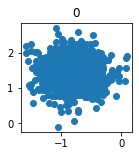

[-0.8187391  1.4204962] [0.28695828 0.373496  ]


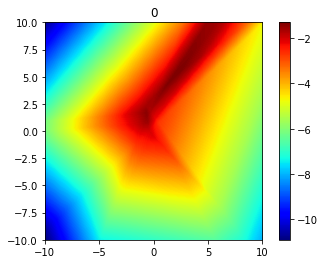

Iteration 1
Learning with Cross Entropy


/Users/anandsranjan/miniconda3/envs/games_env/lib/python3.9/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment FeedbackEnv-v0
  logger.warn("Overriding environment {}".format(id))


Learning with PPO


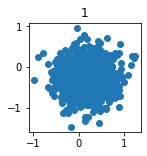

[ 0.18250021 -0.26241568] [0.32954127 0.33707705]


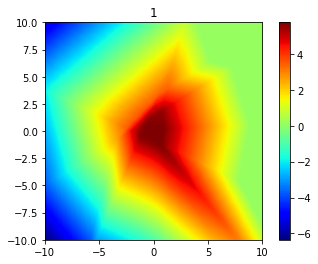

Iteration 2
Learning with Cross Entropy
Learning with PPO


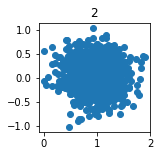

[0.96700656 0.06685556] [0.30064034 0.30801845]


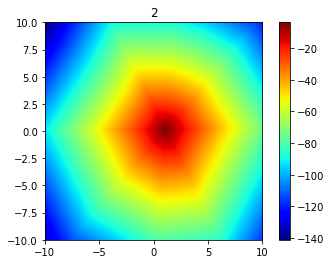

Iteration 3
Learning with Cross Entropy
Learning with PPO


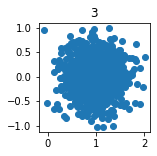

[0.97249496 0.02189736] [0.32402748 0.34832883]


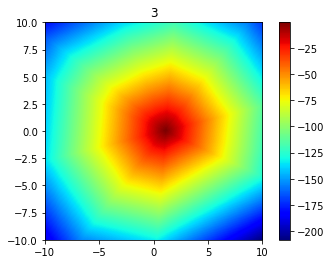

Iteration 4
Learning with Cross Entropy
Learning with PPO


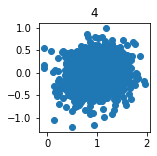

[ 0.98561555 -0.01243099] [0.33141136 0.32442367]


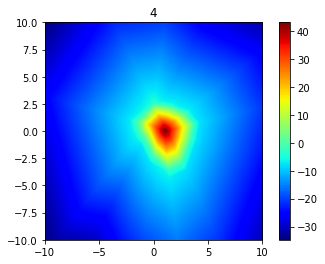

Iteration 5
Learning with Cross Entropy
Learning with PPO


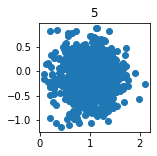

[ 0.9952981  -0.09946569] [0.3083426 0.3439515]


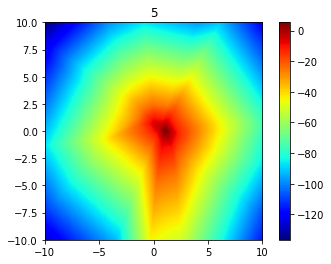

Iteration 6
Learning with Cross Entropy
Learning with PPO


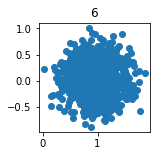

[0.95316964 0.04637573] [0.29577792 0.30218482]


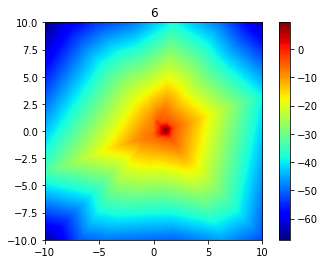

Iteration 7
Learning with Cross Entropy
Learning with PPO


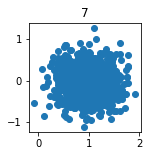

[ 1.0001413  -0.03240976] [0.3223262 0.3397422]


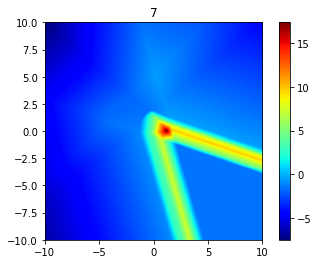

Iteration 8
Learning with Cross Entropy
Learning with PPO


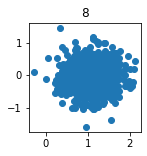

[ 1.0870339  -0.03037185] [0.34894997 0.37910375]


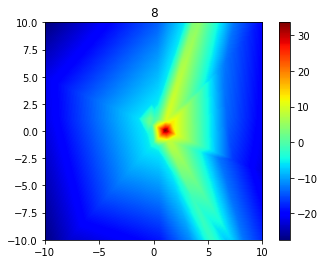

Iteration 9
Learning with Cross Entropy
Learning with PPO


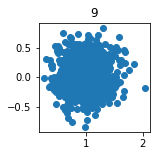

[0.9835668  0.03219831] [0.2483751 0.2516756]


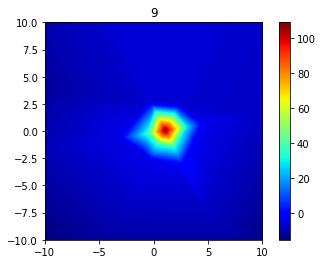

In [4]:
comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print("Iteration", i)
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    samples[i] = sample
    reward_fns[i] = reward_fn

    plot_sampler(samples[i], title=str(i), n=1000)
    visualize_fn(reward_fns[i], title=str(i), x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)